In [45]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

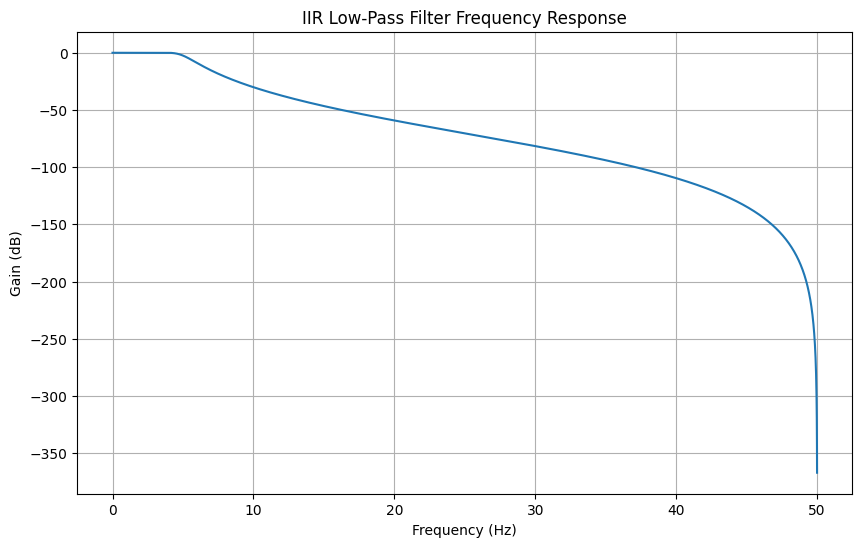

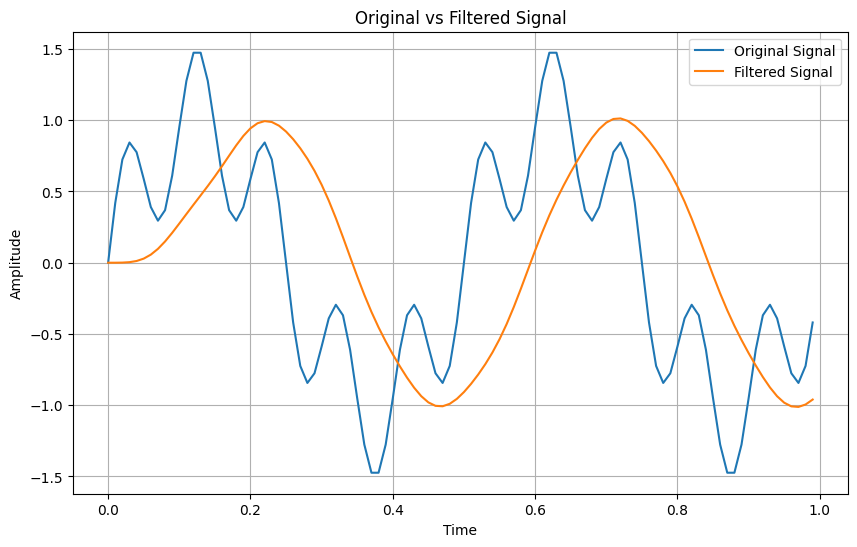

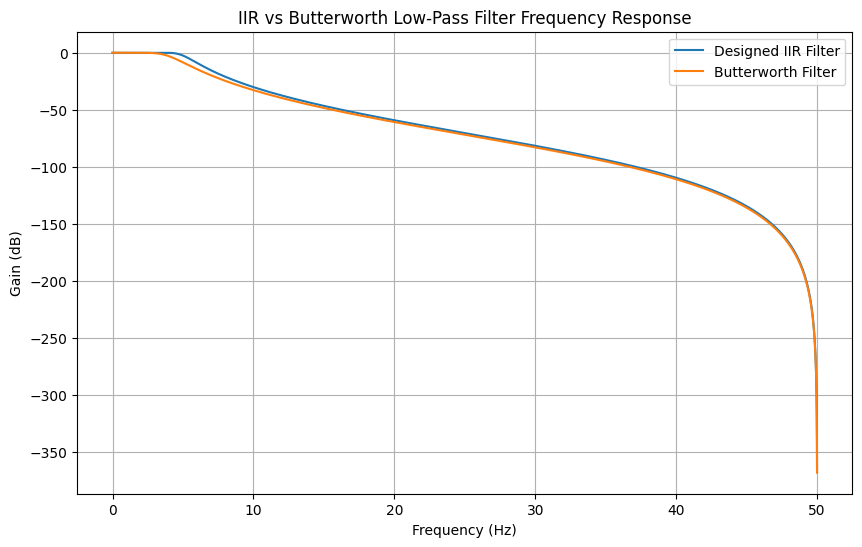

In [46]:
# Filter specifications
fc = 4  # Cutoff frequency
fs = 100  # Sampling frequency
passband_ripple = 0.05  # Passband ripple as a single value
stopband_ripple = 0.05  # Stopband ripple as a single value

# Calculate normalized cutoff frequency
normalized_fc = fc / (fs / 2)

# Design IIR filter
order = 4  # 4th order filter for example
b, a = signal.iirfilter(order, normalized_fc, btype='low', rp=passband_ripple, rs=stopband_ripple, analog=False, ftype='cheby1')

# Frequency response of the filter
w, h = signal.freqz(b, a, worN=8000)
freq = fs * 0.5 * w / np.pi
response_db = 20 * np.log10(abs(h))

# Plot frequency response in decibels
plt.figure(figsize=(10, 6))
plt.plot(freq, response_db)
plt.title('IIR Low-Pass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid()
plt.show()

# Generate a test signal
t = np.linspace(0, 1, fs, endpoint=False)
test_signal = np.sin(2 * np.pi * 2 * t) + 0.5 * np.sin(2 * np.pi * 10 * t)

# Apply the IIR filter to the test signal
filtered_signal = signal.lfilter(b, a, test_signal)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, test_signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.title('Original vs Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Design Butterworth filter
b_butter, a_butter = signal.butter(order, normalized_fc, btype='low')

# Frequency response of Butterworth filter
w_butter, h_butter = signal.freqz(b_butter, a_butter, worN=8000)
freq_butter = fs * 0.5 * w_butter / np.pi
response_db_butter = 20 * np.log10(abs(h_butter))

# Plot frequency response of Butterworth filter
plt.figure(figsize=(10, 6))
plt.plot(freq, response_db, label='Designed IIR Filter')
plt.plot(freq_butter, response_db_butter, label='Butterworth Filter')
plt.title('IIR vs Butterworth Low-Pass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.legend()
plt.grid()
plt.show()

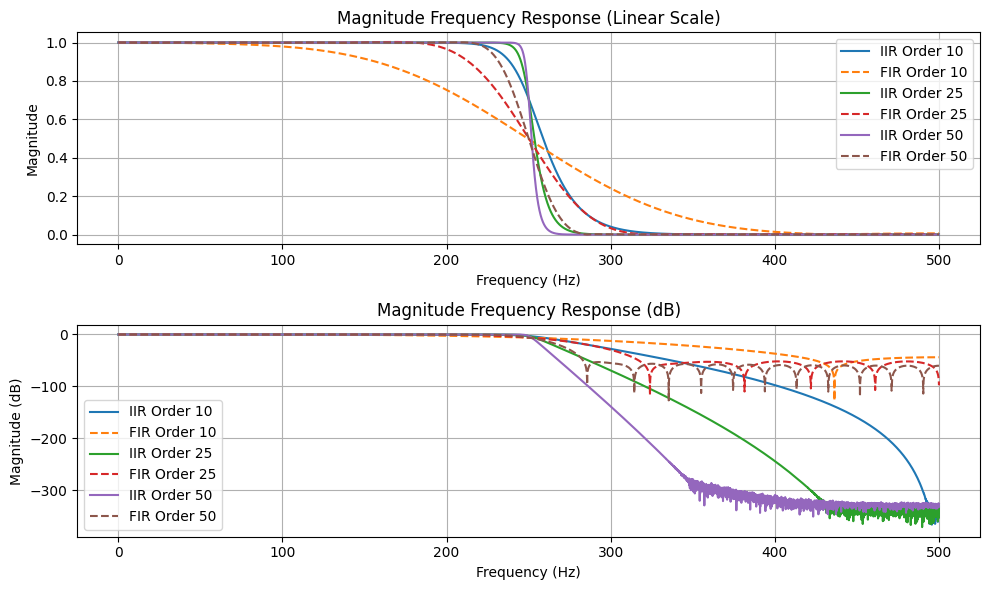

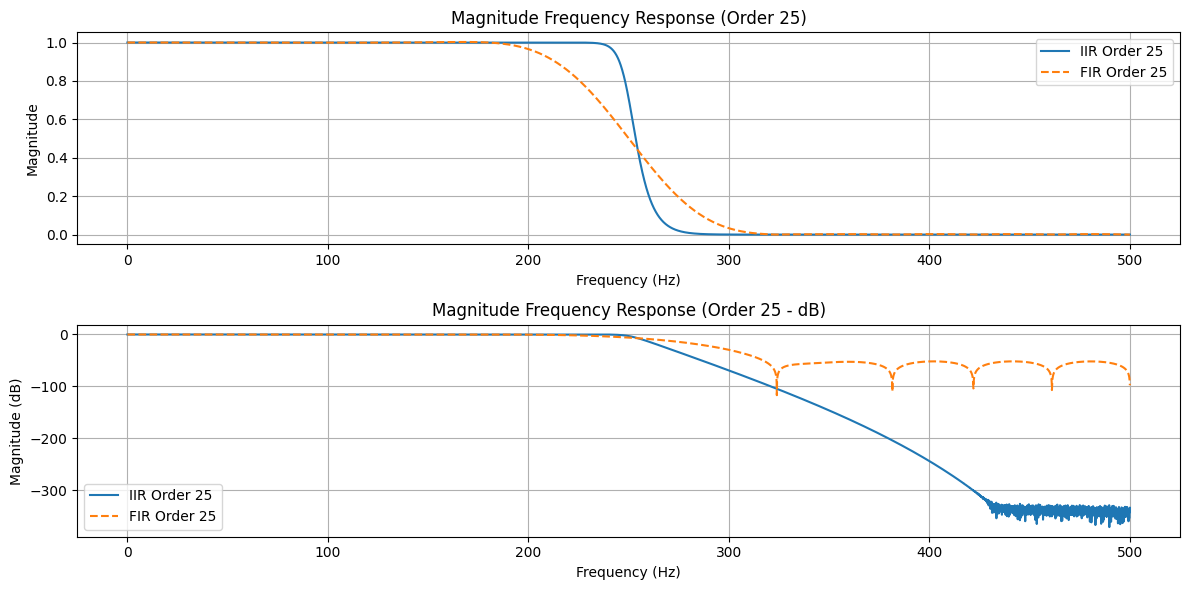

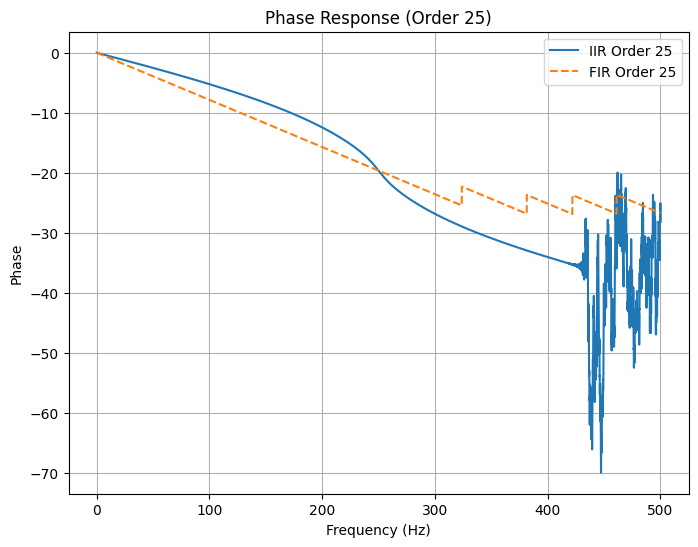

In [47]:
# Specifications
fs = 1000  # Sampling frequency
fc = fs / 2  # Cutoff frequency at half the Nyquist frequency

# Orders for the filters
orders = [10, 25, 50]

# Design IIR filters
iir_filters = {}
for order in orders:
    b_iir, a_iir = signal.butter(order, fc / fs, btype='low')
    iir_filters[order] = (b_iir, a_iir)

# Design FIR filters
fir_filters = {}
for order in orders:
    taps = signal.firwin(order + 1, fc / fs, pass_zero='lowpass')
    fir_filters[order] = taps

# Compare magnitude frequency response for different orders in linear scale and dB
plt.figure(figsize=(10, 6))
for order in orders:
    # IIR filter frequency response
    w_iir, h_iir = signal.freqz(iir_filters[order][0], iir_filters[order][1], worN=8000)
    freq_iir = fs * 0.5 * w_iir / np.pi
    response_db_iir = 20 * np.log10(abs(h_iir))

    # FIR filter frequency response
    w_fir, h_fir = signal.freqz(fir_filters[order], worN=8000)
    freq_fir = fs * 0.5 * w_fir / np.pi
    response_db_fir = 20 * np.log10(abs(h_fir))

    plt.subplot(2, 1, 1)
    plt.plot(freq_iir, abs(h_iir), label=f'IIR Order {order}')
    plt.plot(freq_fir, abs(h_fir), label=f'FIR Order {order}', linestyle='--')
    plt.title('Magnitude Frequency Response (Linear Scale)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(freq_iir, response_db_iir, label=f'IIR Order {order}')
    plt.plot(freq_fir, response_db_fir, label=f'FIR Order {order}', linestyle='--')
    plt.title('Magnitude Frequency Response (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Compare magnitude and phase response of IIR and FIR filters of order 25
order_25 = 25

# IIR filter frequency and phase response
w_iir_25, h_iir_25 = signal.freqz(iir_filters[order_25][0], iir_filters[order_25][1], worN=8000)
freq_iir_25 = fs * 0.5 * w_iir_25 / np.pi
response_db_iir_25 = 20 * np.log10(abs(h_iir_25))
phase_iir_25 = np.unwrap(np.angle(h_iir_25))

# FIR filter frequency and phase response
w_fir_25, h_fir_25 = signal.freqz(fir_filters[order_25], worN=8000)
freq_fir_25 = fs * 0.5 * w_fir_25 / np.pi
response_db_fir_25 = 20 * np.log10(abs(h_fir_25))
phase_fir_25 = np.unwrap(np.angle(h_fir_25))

# Plot magnitude response of IIR and FIR filters of order 25
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_iir_25, abs(h_iir_25), label='IIR Order 25')
plt.plot(freq_fir_25, abs(h_fir_25), label='FIR Order 25', linestyle='--')
plt.title('Magnitude Frequency Response (Order 25)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()

# Plot magnitude response in dB of IIR and FIR filters of order 25
plt.subplot(2, 1, 2)
plt.plot(freq_iir_25, response_db_iir_25, label='IIR Order 25')
plt.plot(freq_fir_25, response_db_fir_25, label='FIR Order 25', linestyle='--')
plt.title('Magnitude Frequency Response (Order 25 - dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Compare phase response of IIR and FIR filters of order 25
plt.figure(figsize=(8, 6))
plt.plot(freq_iir_25, phase_iir_25, label='IIR Order 25')
plt.plot(freq_fir_25, phase_fir_25, label='FIR Order 25', linestyle='--')
plt.title('Phase Response (Order 25)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.legend()
plt.grid()
plt.show()

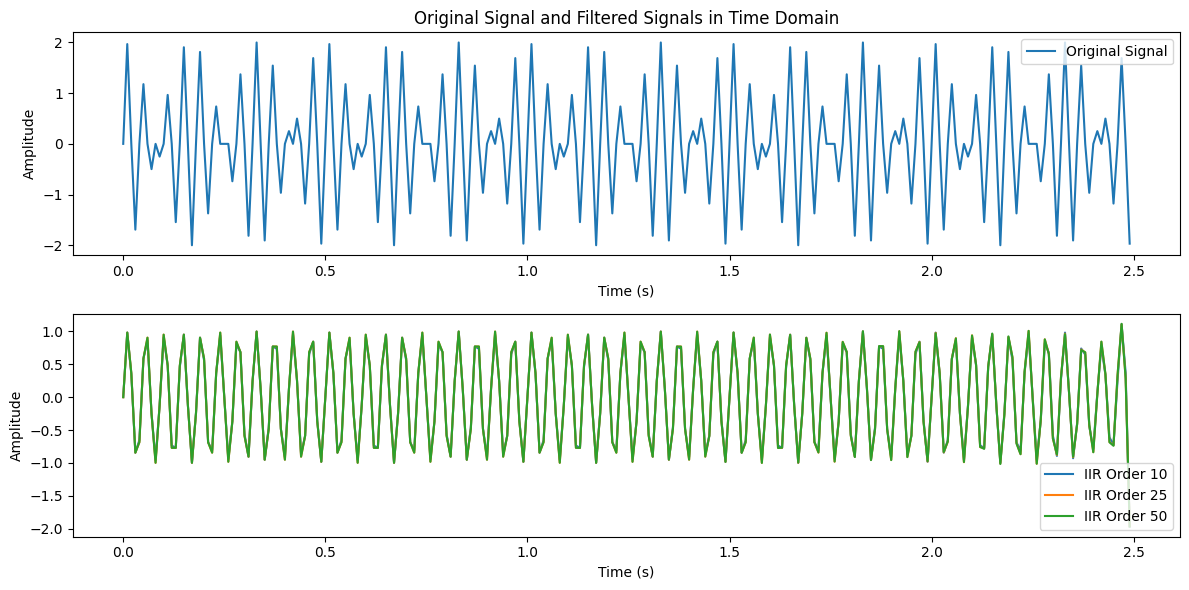

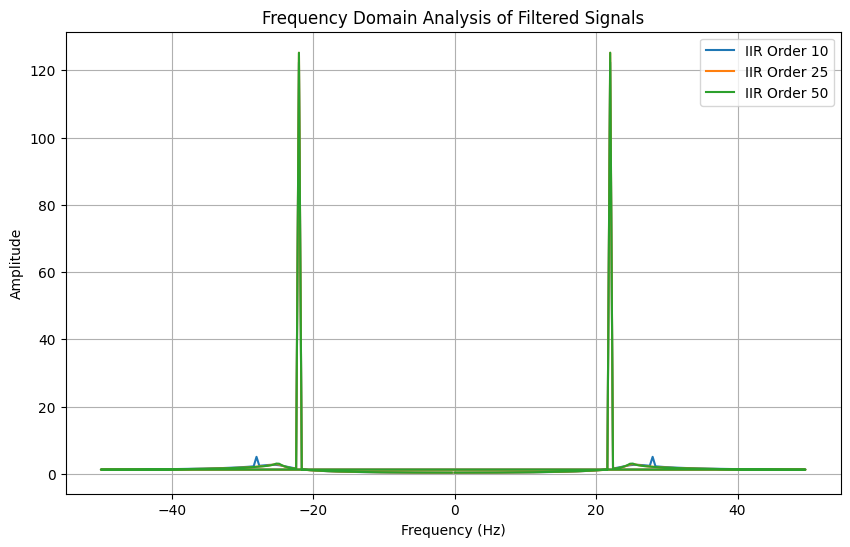

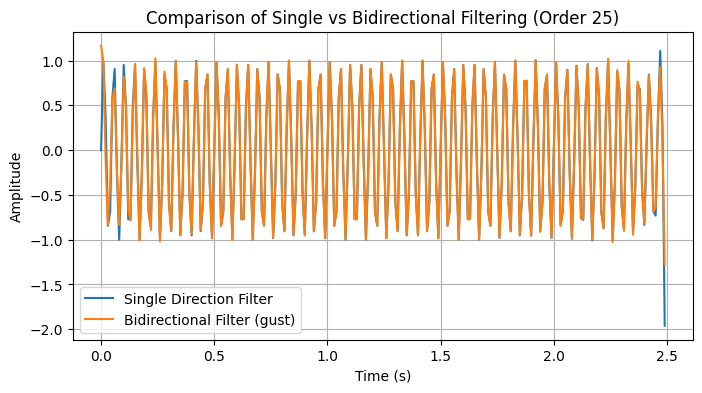

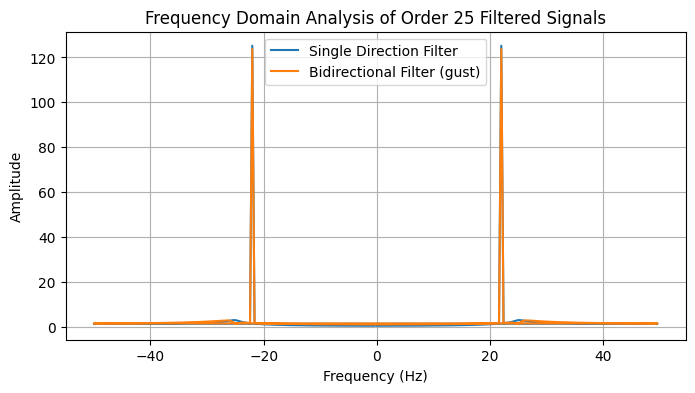

In [48]:
# Signal parameters
fs = 100  # Sampling frequency
L = 2.5  # Signal duration in seconds
t = np.arange(0, L, 1/fs)  # Time vector
frequencies = [22, 28]  # Frequencies of interest
A = 1  # Amplitude for both frequencies

# Generate the signal with two frequencies
input_signal = A * (np.sin(2 * np.pi * frequencies[0] * t) + np.sin(2 * np.pi * frequencies[1] * t))

# Apply the three IIR filters to the signal
filtered_signals = {}
for order in orders:
    b, a = iir_filters[order]
    filtered_signals[order] = signal.filtfilt(b, a, input_signal)

# Plot the original and filtered signals in the time domain
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label='Original Signal')
plt.title('Original Signal and Filtered Signals in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

for order in orders:
    plt.subplot(2, 1, 2)
    plt.plot(t, filtered_signals[order], label=f'IIR Order {order}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()

# Analyze the signals in the Fourier domain
plt.figure(figsize=(10, 6))
for order in orders:
    freq = np.fft.fftfreq(len(input_signal)) * fs
    spectrum = np.abs(np.fft.fft(filtered_signals[order]))
    plt.plot(freq, spectrum, label=f'IIR Order {order}')

plt.title('Frequency Domain Analysis of Filtered Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Apply order 25 filter bidirectionally and compare with single-direction filtering
b_25, a_25 = iir_filters[25]

filtered_signal_25_single = signal.filtfilt(b_25, a_25, input_signal)
filtered_signal_25_bidirectional = signal.filtfilt(b_25, a_25, input_signal, method='gust')

# Plot the results of single and bidirectional filtering in the time domain
plt.figure(figsize=(8, 4))
plt.plot(t, filtered_signal_25_single, label='Single Direction Filter')
plt.plot(t, filtered_signal_25_bidirectional, label='Bidirectional Filter (gust)')
plt.title('Comparison of Single vs Bidirectional Filtering (Order 25)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Analyze the Fourier domain representation of both filtered signals
plt.figure(figsize=(8, 4))

freq_25_single = np.fft.fftfreq(len(input_signal)) * fs
spectrum_25_single = np.abs(np.fft.fft(filtered_signal_25_single))
plt.plot(freq_25_single, spectrum_25_single, label='Single Direction Filter')

freq_25_bidirectional = np.fft.fftfreq(len(input_signal)) * fs
spectrum_25_bidirectional = np.abs(np.fft.fft(filtered_signal_25_bidirectional))
plt.plot(freq_25_bidirectional, spectrum_25_bidirectional, label='Bidirectional Filter (gust)')

plt.title('Frequency Domain Analysis of Order 25 Filtered Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [49]:
# Given parameters
fs = 100
L = 2.5
frequencies = [22, 28]
amplitude = 1

# Generate signal
t = np.arange(0, L, 1/fs)
input_signal = amplitude * (np.sin(2 * np.pi * frequencies[0] * t) + np.sin(2 * np.pi * frequencies[1] * t))

# IIR filter with different orders
orders = [10, 25, 50]
filtered_signals = []

for order in orders:
    b_iir, a_iir = signal.butter(order, 0.5, btype='low', analog=False, output='ba')
    filtered_signal = signal.lfilter(b_iir, a_iir, signal)
    filtered_signals.append(filtered_signal)

# Plot time-domain signals
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
for i, order in enumerate(orders):
    plt.plot(t, filtered_signals[i], label=f'IIR Order {order}')
plt.title('Time Domain Signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim([0, 1])
plt.legend()

# Plot Fourier domain signals
plt.subplot(2, 1, 2)
for i, order in enumerate(orders):
    plt.magnitude_spectrum(filtered_signals[i], Fs=fs, label=f'IIR Order {order}', scale='dB')
plt.title('Frequency Domain Signals')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

# Also, apply the order 25 filter bidirectionally with filtfilt()
order_bidirectional = 25
b_iir_bidirectional, a_iir_bidirectional = signal.butter(order_bidirectional, 0.5, btype='low', analog=False, output='ba')

# Apply bidirectional filter using filtfilt()
filtered_signal_bidirectional = signal.filtfilt(b_iir_bidirectional, a_iir_bidirectional, input_signal)

# Plot time-domain signals for bidirectional filter
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signals[1], label='IIR Order 25 (Unidirectional)')
plt.plot(t, filtered_signal_bidirectional, label='IIR Order 25 (Bidirectional)')
plt.title('Time Domain Signals with Bidirectional Filter')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim([0, 1])
plt.show()

# Plot Fourier domain signals for bidirectional filter
plt.figure(figsize=(12, 6))
plt.magnitude_spectrum(filtered_signals[1], Fs=fs, label='IIR Order 25 (Unidirectional)', scale='dB')
plt.magnitude_spectrum(filtered_signal_bidirectional, Fs=fs, label='IIR Order 25 (Bidirectional)', scale='dB')
plt.title('Frequency Domain Signals with Bidirectional Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.grid()
plt.show()

ValueError: ignored

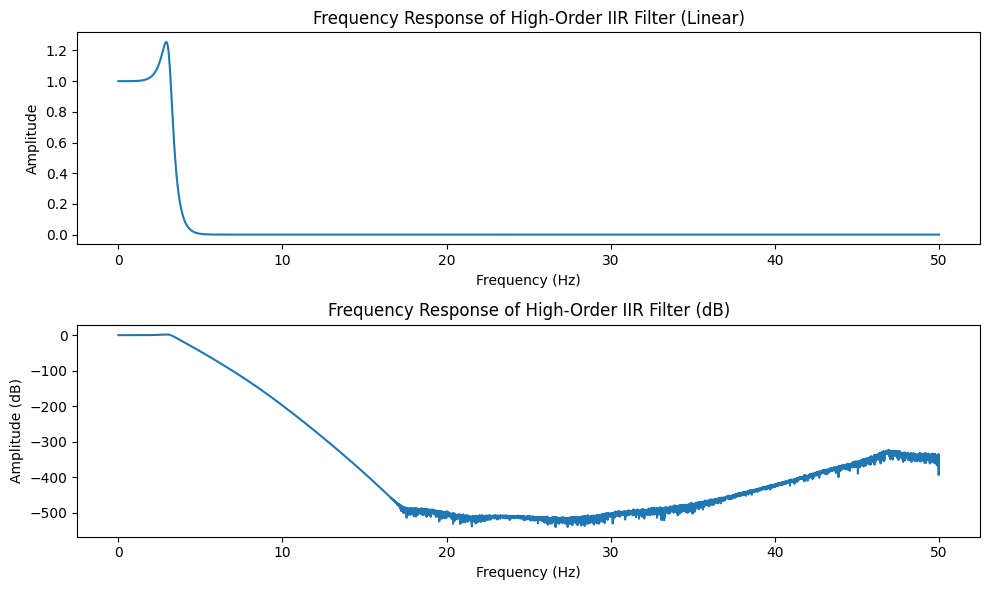

In [50]:
# High-order IIR filter
order = 250
nyquist = 0.5 * fs  # Assuming fs is your sampling frequency
cut_off = nyquist / 2

b_high, a_high = signal.butter(order, cut_off, btype='low', analog=False, fs=fs)

# Frequency response analysis
w, h = signal.freqz(b_high, a_high, worN=8000)
frequency = fs * w / (2 * np.pi)

# Plot frequency response
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frequency, np.abs(h))
plt.title('Frequency Response of High-Order IIR Filter (Linear)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequency, 20 * np.log10(np.abs(h)))
plt.title('Frequency Response of High-Order IIR Filter (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.tight_layout()
plt.show()

zpk = signal.butter(order, cut_off, btype='low', analog=False, output='zpk', fs=fs)

# Extracting zero-pole-gain coefficients
zeros, poles, gain = zpk

# Creating the filter using zero-pole-gain coefficients
b_high_zpk, a_high_zpk = signal.zpk2tf(zeros, poles, gain)